In [3]:
#double check install

In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
 df = pd.read_csv("rmgeolocation_29-12.csv")

In [ ]:
#Cleaning and organising the Data

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Address', 'Description', 'Price',
       'Postcode', 'Full_Postcode', 'number_bedrooms', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
df1 = df.drop(['Address','Description','Postcode','Full_Postcode','Unnamed: 0.1','Unnamed: 0'],axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32380 entries, 0 to 32379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            32373 non-null  float64
 1   number_bedrooms  32225 non-null  float64
 2   Latitude         32172 non-null  float64
 3   Longitude        32172 non-null  float64
dtypes: float64(4)
memory usage: 1012.0 KB


In [ ]:
df1.dropna(inplace=True)

In [ ]:
#From viewing df using Google Map service, some geolocations are incorrect: they are in USA (n.b Longitude is -ve)
data = df1[(df1['Longitude'] > -1.5) & (df1['Longitude'] < 1.2) & (df1['Latitude'] < 52) & (df1['Latitude'] > 51)]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31817 entries, 0 to 32379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            31817 non-null  float64
 1   number_bedrooms  31817 non-null  float64
 2   Latitude         31817 non-null  float64
 3   Longitude        31817 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [ ]:
#Export for other visualisations
data.to_csv('RmVisualisation.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['Price'], axis=1)
y = data['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data0 = x_train.join(y_train)

In [ ]:
# Data Exploration

NameError: name 'hist' is not defined

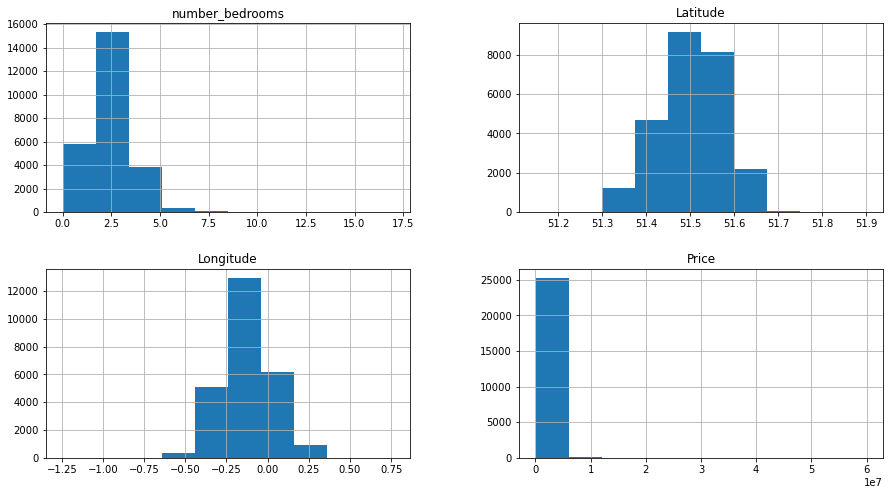

In [ ]:
train_data0.hist(figsize=(15,8))
hist.savefig('hist.png')

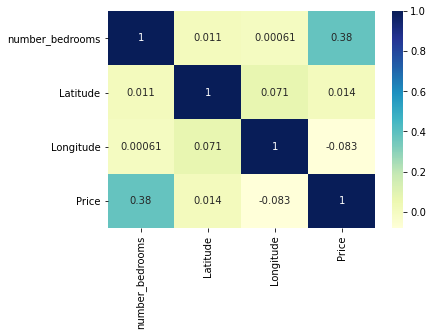

In [ ]:
sns_heatmap = sns.heatmap(train_data0.corr(), annot=True, cmap="YlGnBu")
fig = sns_heatmap.get_figure()
fig.savefig('mlheatmap.png')

<AxesSubplot:xlabel='Longitude', ylabel='Price'>

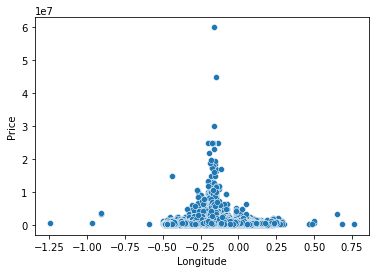

In [ ]:
sns.scatterplot(x="Longitude", y="Price", data=train_data0)
plt.savefig('scatterplotlongitude.png')

<AxesSubplot:xlabel='Latitude', ylabel='Price'>

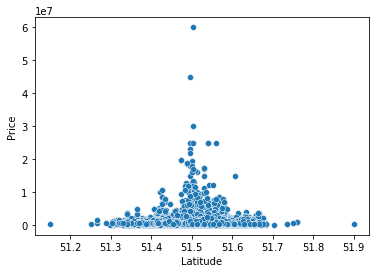

In [ ]:
sns.scatterplot(x="Latitude", y="Price", data=train_data0)
plt.savefig('scatterplotlatitude.png')

<AxesSubplot:xlabel='number_bedrooms', ylabel='Price'>

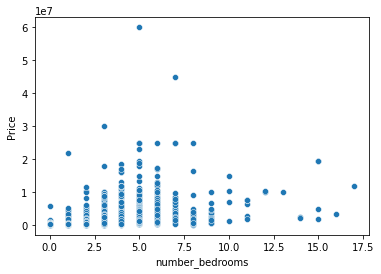

In [ ]:
sns.scatterplot(x="number_bedrooms", y="Price", data=train_data0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.686337042550567

In [ ]:
#The model is 68.63% accurate

In [ ]:
#standardising the training and test data as specified in weekly tasks into standardised x matrix and y vector. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train)
scaler_y = StandardScaler()
y_train1 = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
x_test1 = scaler.transform(x_test)
y_test1 = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
#4 Implement random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor()


forest1.fit(x_train1, y_train1.ravel())

RandomForestRegressor()

In [ ]:
forest1.score(x_test1, y_test1)

0.7115732787203177

In [ ]:
#With standadisiation the model performs slightly better. The model is 71.15% accurate.

In [ ]:
#tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV
forest2 = RandomForestRegressor()
param_grid = {
    "n_estimators": [100],  
    "min_samples_split": [2],  
    "max_depth": [None]  
}

grid_search = GridSearchCV(forest2, param_grid, cv=3,  
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train1, y_train1.ravel())



KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(x_test1, y_test1)

In [ ]:
#tuning the model slightlty improves accuracy

In [ ]:
#Not bad!